###  Regresión y regresión

# Plan
* Pasar y extensión py
* Abrir en spider
* Acumular resultados
* Cargar en power bi
* Dormir

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
conGraficos=True

# Funciones

In [4]:
def hm_corr_graf(corr_matrix_V2, cat):
    aux=pd.pivot_table(corr_matrix_V2,columns=['variable_2'],index=['variable_1'],values=['r'])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    sns.heatmap(
        aux,
        annot     = True,
        cbar      = False,
        annot_kws = {"size": 10},
        vmin      = -0.5,
        vmax      = 0.5,
        center    = 0,
        cmap      = sns.diverging_palette(20, 220, n=200),
        square    = True,
        ax        = ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )
    ax.tick_params(labelsize = 10)
    ax.set_title(cat)

In [5]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [6]:
def dic_corr_ind(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    #res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    #res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional=res_corr_total_raz_nacional.sort_values('variable_1')
    
    #return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones
    return res_corr_total_raz_nacional

In [7]:
def dic_corr_mes_ind(data):
    #res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,12):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
        #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        #dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,12):
        print(i)
        #aux_tab_var=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_causas2)]
        #aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        #aux_tab_var.columns=['variable_1',str(i)+'_r']
        ###aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        aux_tab_sel.columns=['variable_1',i]
        #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    #res_corr_total_var_T=res_corr_total_var.T
    #res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    #res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    #return res_corr_total_raz_T, res_corr_total_var_T
    return res_corr_total_raz_T

In [8]:
def iter_regresion_VIF(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            if fila_problema['VIF'].values[0]>20 :
                variables_eliminar=fila_problema['Features']
            else:
                flag=0 
                
    return df_revision

In [9]:
def iter_regresion(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            flag=0
            #fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            #if fila_problema['VIF'].values[0]>20 :
            #    variables_eliminar=fila_problema['Features']
            #else:                 
                
    return df_revision

In [10]:
def dic_reg_mes_ind(data_reg):
    df_coef=df_coef_nal
    df_vif=df_vif_nal
    dic_resultados={}
    
    for i in range(1,12):
        dic_aux={}
        data_aux=data_reg[data_reg['FECHA']==i] 
        data_aux.drop(columns=['FECHA'],inplace=True)
        #data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
        
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]    
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados[i]=dic_aux
    
    for i in range(1,12):
        print(i)

        aux_tab_coef=dic_resultados[i]['coef']
        aux_tab_vif=dic_resultados[i]['vif']

        #aux_tab_coef.columns=[str(i)+'_coef']
        aux_tab_coef.columns=[i]
        #aux_tab_vif.columns=['Features',str(i)+'_vif']
        aux_tab_vif.columns=['Features',i]

        df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
        df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

    return df_coef, df_vif

# Carga Preprocesamiento

In [11]:
data_c0= pd.read_csv('../NODOS_FILTRADOS_todos_ajuste_llamadas.csv',sep=';', header = 0)

In [12]:
data_c0.describe()

,MES,CANT_USER,BAJAS_1.TOTAL,BAJAS_2.CHURN_TEMPRANO,BAJAS_3.CHURN_7_24,BAJAS_4.VOL,BAJAS_5.INVOL,BAJAS_6.VOL_CHURN_TEMPRANO,BAJAS_7.INVOL_CHURN_TEMPRANO,BAJAS_8.VOL_CHURN_7_24,...,BAJAS_36.@_INVOL_CHURN_7_24,ALFA,ALFA_tarifa,BETA,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
count,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,40920.000000,...,40920.000000,40854.000000,40460.000000,40900.000000,40920.000000,40920.000000,40920.000000,40873.000000,40905.000000,40920.000000
mean,6.000000,275.469599,0.081841,0.014648,0.026227,0.042387,0.039454,0.002448,0.012201,0.010788,...,0.005869,1.327170,0.959862,1.300539,2.084167,1.413268,0.607031,1.027683,0.492774,0.361464
std,3.162316,132.125541,0.046878,0.019649,0.025442,0.028768,0.038787,0.005711,0.018080,0.013734,...,0.007343,0.952965,0.189934,0.577798,0.522468,0.349927,0.233454,0.591396,0.146034,0.095480
min,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.415299,0.139640,0.810591,0.507692,0.085366,0.000000,0.000000,0.118538
25%,3.000000,179.000000,0.049451,0.000000,0.007692,0.023649,0.011050,0.000000,0.000000,0.000000,...,0.000000,0.621516,0.819878,0.916020,1.710430,1.161826,0.444721,0.574017,0.385401,0.292254
50%,6.000000,258.000000,0.073810,0.008621,0.020595,0.037736,0.029580,0.000000,0.004717,0.006780,...,0.003817,1.129837,0.945336,1.185031,2.020168,1.377182,0.559140,0.952348,0.490298,0.347161
75%,9.000000,348.000000,0.105820,0.021978,0.037916,0.055266,0.057143,0.000000,0.018519,0.017422,...,0.008889,1.803862,1.081372,1.539098,2.390311,1.625000,0.716814,1.399959,0.598192,0.414185
max,11.000000,1366.000000,0.714286,0.363636,0.305085,0.670996,0.433447,0.088235,0.363636,0.144231,...,0.101695,6.372842,1.514445,4.666667,4.284211,2.701754,1.700787,3.175737,0.879946,0.688474


In [13]:
data_c0.columns

Index(['MES', 'NODO', 'DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO',
       'CANT_USER', 'BAJAS_1.TOTAL', 'BAJAS_2.CHURN_TEMPRANO',
       'BAJAS_3.CHURN_7_24', 'BAJAS_4.VOL', 'BAJAS_5.INVOL',
       'BAJAS_6.VOL_CHURN_TEMPRANO', 'BAJAS_7.INVOL_CHURN_TEMPRANO',
       'BAJAS_8.VOL_CHURN_7_24', 'BAJAS_9.INVOL_CHURN_7_24', 'BAJAS_10.V',
       'BAJAS_11.V_CHURN_TEMPRANO', 'BAJAS_12.V_CHURN_7_24', 'BAJAS_13.V_VOL',
       'BAJAS_14.V_INVOL', 'BAJAS_15.V_VOL_CHURN_TEMPRANO',
       'BAJAS_16.V_INVOL_CHURN_TEMPRANO', 'BAJAS_17.V_VOL_CHURN_7_24',
       'BAJAS_18.V_INVOL_CHURN_7_24', 'BAJAS_19.T',
       'BAJAS_20.T_CHURN_TEMPRANO', 'BAJAS_21.T_CHURN_7_24', 'BAJAS_22.T_VOL',
       'BAJAS_23.T_INVOL', 'BAJAS_24.T_VOL_CHURN_TEMPRANO',
       'BAJAS_25.T_INVOL_CHURN_TEMPRANO', 'BAJAS_26.T_VOL_CHURN_7_24',
       'BAJAS_27.T_INVOL_CHURN_7_24', 'BAJAS_28.@',
       'BAJAS_29.@_CHURN_TEMPRANO', 'BAJAS_30.@_CHURN_7_24', 'BAJAS_31.@_VOL',
       'BAJAS_32.@_INVOL', 'BAJAS_33.@_VOL_CHURN_TEMPRANO

In [14]:
sel_variables_descrip=['MES','NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO','CANT_USER']
sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'MEGA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M','PENETRACION','OCUPACION_DW']
columns_bajas=list(data_c0.filter(regex=("BAJAS.*")).columns)

### Reemplazar nombre de columnas por compatibilidad

In [15]:
data_c0.rename(columns={'MES':'FECHA','NODO':'COD_NODO'}, inplace=True)

In [16]:
maestro_data=data_c0[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].drop_duplicates()

## CORRELACIONES

###  Correlacion Bajas Totales

##  Funcion validar configuraciones Nacional

In [142]:
list(data_c0.columns)

['FECHA',
 'COD_NODO',
 'DIVISION',
 'AREA',
 'ZONA',
 'CIUDAD',
 'DISTRITO',
 'CANT_USER',
 'BAJAS_1.TOTAL',
 'BAJAS_2.CHURN_TEMPRANO',
 'BAJAS_3.CHURN_7_24',
 'BAJAS_4.VOL',
 'BAJAS_5.INVOL',
 'BAJAS_6.VOL_CHURN_TEMPRANO',
 'BAJAS_7.INVOL_CHURN_TEMPRANO',
 'BAJAS_8.VOL_CHURN_7_24',
 'BAJAS_9.INVOL_CHURN_7_24',
 'BAJAS_10.V',
 'BAJAS_11.V_CHURN_TEMPRANO',
 'BAJAS_12.V_CHURN_7_24',
 'BAJAS_13.V_VOL',
 'BAJAS_14.V_INVOL',
 'BAJAS_15.V_VOL_CHURN_TEMPRANO',
 'BAJAS_16.V_INVOL_CHURN_TEMPRANO',
 'BAJAS_17.V_VOL_CHURN_7_24',
 'BAJAS_18.V_INVOL_CHURN_7_24',
 'BAJAS_19.T',
 'BAJAS_20.T_CHURN_TEMPRANO',
 'BAJAS_21.T_CHURN_7_24',
 'BAJAS_22.T_VOL',
 'BAJAS_23.T_INVOL',
 'BAJAS_24.T_VOL_CHURN_TEMPRANO',
 'BAJAS_25.T_INVOL_CHURN_TEMPRANO',
 'BAJAS_26.T_VOL_CHURN_7_24',
 'BAJAS_27.T_INVOL_CHURN_7_24',
 'BAJAS_28.@',
 'BAJAS_29.@_CHURN_TEMPRANO',
 'BAJAS_30.@_CHURN_7_24',
 'BAJAS_31.@_VOL',
 'BAJAS_32.@_INVOL',
 'BAJAS_33.@_VOL_CHURN_TEMPRANO',
 'BAJAS_34.@_INVOL_CHURN_TEMPRANO',
 'BAJAS_35.@_VOL_CH

In [17]:
#data_c0['BAJAS_1.TOTAL'].sum()
data_c0['BAJAS_31.@_VOL'].sum()


654.8626827798103

In [18]:
data_c0['ind_churn']=data_c0['BAJAS_31.@_VOL']

In [19]:
data_c0['COD_NODO'].value_counts().min()

11

In [20]:
#Eliminar validación ==1
data_c0['val_ind']=np.where(data_c0['ind_churn']==0,1,0)

In [21]:
data_c0.groupby('COD_NODO')[['val_ind']].max().describe()

,val_ind
count,3720.000000
mean,0.337903
std,0.473059
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [22]:
data_c0['COD_NODO'].nunique()

3720

In [23]:
res_nodo=data_c0.groupby('COD_NODO')[['val_ind']].max()

In [24]:
res_nodo['val_ind'].value_counts()

0    2463
1    1257
Name: val_ind, dtype: int64

In [25]:
# TODA LA DATA
#data_c0=data_c0[data_c0['COD_NODO'].isin(res_nodo[res_nodo['val_ind']==0].index)]

In [26]:
data_c0['COD_NODO'].nunique()

3720

# Val Configuraciones

In [27]:
DataSetEntregable_totales=pd.DataFrame()

In [28]:
DataSetEntregable_totales_temp=pd.DataFrame()

In [29]:
res_corr_total_raz_nacional=dic_corr_ind(data_c0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
res_corr_total_raz_nacional.rename(columns={'r':'NACIONAL'},inplace=True)

In [31]:
RV_nal_c0=dic_corr_ind(data_c0)

In [32]:
RV_nal_c0.rename(columns={'r':'NACIONAL'},inplace=True)

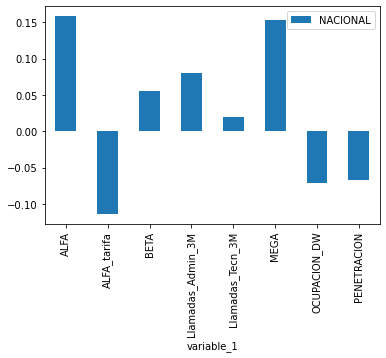

In [33]:
if conGraficos:
    RV_nal_c0.set_index('variable_1').plot.bar()

In [34]:
DataSetEntregable_totales=RV_nal_c0.copy()

In [35]:
DataSetEntregable_totales=DataSetEntregable_totales.set_index('variable_1').T

### Correlaciones x Periodo

### Funcion correlaciones por periodo
* Recibe los datos y retorna data framames para graficar

In [36]:
#(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_c0)
res_corr_total_raz_T=dic_corr_mes_ind(data_c0)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
1,0.182939,-0.145147,0.027591,0.136119,0.084383,0.19193,-0.081185,-0.007017
2,0.198935,-0.161004,0.062106,0.146656,0.068285,0.199929,-0.0808,-0.026581
3,0.187576,-0.160858,0.082516,0.118053,0.07069,0.174106,-0.07751,-0.050876
4,0.131669,-0.106616,0.040856,0.110994,0.04302,0.129073,-0.081508,-0.081422
5,0.160131,-0.075173,0.042542,0.116737,0.031457,0.16443,-0.063532,-0.095737
6,0.180503,-0.134623,0.056274,0.133368,0.058379,0.179015,-0.085021,-0.089076
7,0.154588,-0.122837,0.028676,0.11573,0.046976,0.167351,-0.077724,-0.080238
8,0.152602,-0.088415,0.022332,0.130113,0.034518,0.172552,-0.03992,-0.060429
9,0.167187,-0.102939,0.036215,0.120999,0.038838,0.173556,-0.099703,-0.061183
10,0.122528,-0.025318,-0.009462,0.183425,0.053334,0.148853,-0.058528,-0.057171


In [38]:
DataSetEntregable_totales_temp=res_corr_total_raz_T.copy()

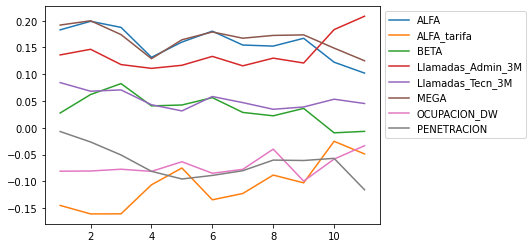

In [39]:
if conGraficos:
    ax = res_corr_total_raz_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

### Analisis Específicos

In [40]:
#data=data_c0.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')
data=data_c0.copy()

In [41]:
data.groupby('DIVISION')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False)

,CANT_USER
DIVISION,
REGION CENTRO,5511084
REGION OCCIDENTE,2378040
REGION NOROCCIDENTE,1985062
REGION ORIENTE,969847
REGION COSTA,428183


In [42]:
data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6)

,CANT_USER
CIUDAD,
BOGOTA,5387124
CALI,1443961
MEDELLIN,1124616
PEREIRA,372451
BUCARAMANGA,338126
IBAGUE,305185


In [43]:
data[data['CIUDAD']=='BOGOTA'].groupby('AREA')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(10)

,CANT_USER
AREA,
BOGOTA NORTE,1478786
BOGOTA ORIENTE,1427870
BOGOTA SUR,1240343
BOGOTA OCCIDENTE,1240125


### Analisis regionales

In [44]:
regionales=data['DIVISION'].unique()
regionales = [x for x in regionales if pd.notnull(x)]
regionales

['REGION COSTA',
 'REGION ORIENTE',
 'REGION CENTRO',
 'REGION NOROCCIDENTE',
 'REGION OCCIDENTE']

In [45]:
dic_resultados={}

In [46]:
for reg in regionales:
    print(reg)
    dic_aux={}
    data_aux=data[data['DIVISION']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados[reg]=dic_aux

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [47]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in regionales:
    print(reg)
    #aux_tab_var=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg]
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
res_corr_total_raz_nacional

,variable_1,NACIONAL
1909,ALFA,0.158021
1958,ALFA_tarifa,-0.113852
2007,BETA,0.054865
2105,Llamadas_Admin_3M,0.079654
2154,Llamadas_Tecn_3M,0.019326
2203,MEGA,0.153120
2252,OCUPACION_DW,-0.071202
2301,PENETRACION,-0.066963


In [49]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [50]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
REGION COSTA,0.139332,-0.131364,0.064993,0.052672,0.040436,0.128191,-0.103941,-0.073132
REGION ORIENTE,0.139316,-0.056828,0.043238,0.186162,0.050221,0.134188,-0.043577,-0.116232
REGION CENTRO,0.145064,-0.17702,0.063073,0.033306,0.010921,0.12934,-0.079718,-0.06867
REGION NOROCCIDENTE,0.091993,-0.065213,0.027967,0.064751,0.022973,0.0915,-0.042292,-0.042657
REGION OCCIDENTE,0.20862,-0.039733,0.062443,0.142094,0.022746,0.210353,-0.067688,-0.11931


In [51]:
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
REGION COSTA,0.139332,-0.131364,0.064993,0.052672,0.040436,0.128191,-0.103941,-0.073132
REGION ORIENTE,0.139316,-0.056828,0.043238,0.186162,0.050221,0.134188,-0.043577,-0.116232
REGION CENTRO,0.145064,-0.17702,0.063073,0.033306,0.010921,0.12934,-0.079718,-0.06867
REGION NOROCCIDENTE,0.091993,-0.065213,0.027967,0.064751,0.022973,0.0915,-0.042292,-0.042657
REGION OCCIDENTE,0.20862,-0.039733,0.062443,0.142094,0.022746,0.210353,-0.067688,-0.11931


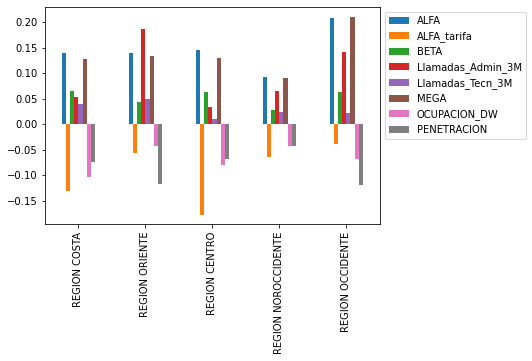

In [52]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(30,20));

### Analisis Temporal_ ESPECIFICO

In [53]:
## guardar en tabla
for reg in regionales:
    data_aux=data[data['DIVISION']==reg]    
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
DataSetEntregable_totales_temp['CATEGORIA']=DataSetEntregable_totales_temp['CATEGORIA'].fillna('NACIONAL')

In [55]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.182939,-0.145147,0.027591,0.136119,0.084383,0.19193,-0.081185,-0.007017,NACIONAL
2,0.198935,-0.161004,0.062106,0.146656,0.068285,0.199929,-0.0808,-0.026581,NACIONAL
3,0.187576,-0.160858,0.082516,0.118053,0.07069,0.174106,-0.07751,-0.050876,NACIONAL
4,0.131669,-0.106616,0.040856,0.110994,0.04302,0.129073,-0.081508,-0.081422,NACIONAL
5,0.160131,-0.075173,0.042542,0.116737,0.031457,0.16443,-0.063532,-0.095737,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.166589,0.039153,0.010628,0.183343,0.047042,0.179422,-0.104516,-0.179846,REGION OCCIDENTE
8,0.281002,-0.085248,0.085343,0.214345,0.142543,0.298417,-0.073054,-0.109443,REGION OCCIDENTE
9,0.159732,-0.066095,0.033986,0.142633,0.025666,0.179014,-0.079308,-0.096567,REGION OCCIDENTE
10,0.162365,-0.032592,-0.019686,0.191985,0.021456,0.18535,-0.069714,-0.166407,REGION OCCIDENTE


## Ciudades

In [56]:
ciudades=data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6).index
ciudades

Index(['BOGOTA', 'CALI', 'MEDELLIN', 'PEREIRA', 'BUCARAMANGA', 'IBAGUE'], dtype='object', name='CIUDAD')

In [57]:
dic_resultados_ciudad={}

In [58]:
for reg in ciudades:
    print(reg)
    dic_aux={}
    data_aux=data[data['CIUDAD']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_ciudad[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


In [59]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in ciudades:
    print(reg)
    #aux_tab_var=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [61]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
BOGOTA,0.144126,-0.17673,0.06256,0.029262,0.009631,0.128845,-0.078626,-0.065132
CALI,0.237801,-0.082376,0.048152,0.101486,-0.019316,0.249298,-0.087979,-0.08512
MEDELLIN,0.12463,-0.075834,0.057815,0.085617,0.083276,0.108622,-0.094627,-0.131381
PEREIRA,0.008878,0.122289,-0.056281,0.05565,-0.08997,0.05799,0.092798,0.089645
BUCARAMANGA,0.056396,0.049136,0.038007,0.121422,0.020145,0.043134,0.032871,-0.000442
IBAGUE,0.073705,0.105366,0.002094,0.155086,-0.008311,0.095292,0.077589,-0.044556


In [62]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
REGION COSTA,0.139332,-0.131364,0.064993,0.052672,0.040436,0.128191,-0.103941,-0.073132
REGION ORIENTE,0.139316,-0.056828,0.043238,0.186162,0.050221,0.134188,-0.043577,-0.116232
REGION CENTRO,0.145064,-0.17702,0.063073,0.033306,0.010921,0.12934,-0.079718,-0.06867
REGION NOROCCIDENTE,0.091993,-0.065213,0.027967,0.064751,0.022973,0.0915,-0.042292,-0.042657
REGION OCCIDENTE,0.20862,-0.039733,0.062443,0.142094,0.022746,0.210353,-0.067688,-0.11931
BOGOTA,0.144126,-0.17673,0.06256,0.029262,0.009631,0.128845,-0.078626,-0.065132
CALI,0.237801,-0.082376,0.048152,0.101486,-0.019316,0.249298,-0.087979,-0.08512
MEDELLIN,0.12463,-0.075834,0.057815,0.085617,0.083276,0.108622,-0.094627,-0.131381
PEREIRA,0.008878,0.122289,-0.056281,0.05565,-0.08997,0.05799,0.092798,0.089645


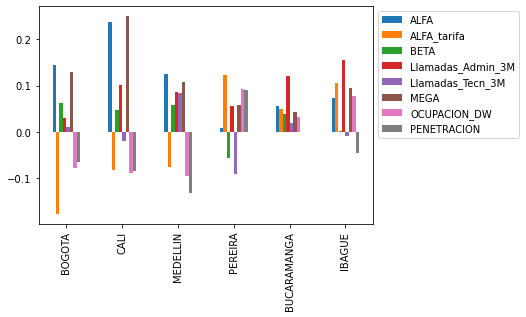

In [63]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

### Analisis temporal

In [64]:
## guardar en tabla
for reg in ciudades:
    data_aux=data[data['CIUDAD']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(



7
8
9
10
11


In [65]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.182939,-0.145147,0.027591,0.136119,0.084383,0.19193,-0.081185,-0.007017,NACIONAL
2,0.198935,-0.161004,0.062106,0.146656,0.068285,0.199929,-0.0808,-0.026581,NACIONAL
3,0.187576,-0.160858,0.082516,0.118053,0.07069,0.174106,-0.07751,-0.050876,NACIONAL
4,0.131669,-0.106616,0.040856,0.110994,0.04302,0.129073,-0.081508,-0.081422,NACIONAL
5,0.160131,-0.075173,0.042542,0.116737,0.031457,0.16443,-0.063532,-0.095737,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,-0.058559,0.218487,-0.224393,0.21324,0.010172,0.070819,0.026782,-0.119131,IBAGUE
8,0.165565,0.185303,0.073712,0.255256,0.131128,0.141086,0.088311,0.077497,IBAGUE
9,0.058126,0.089102,-0.10642,0.20208,0.013442,0.121521,0.239996,0.030627,IBAGUE
10,-0.052816,0.100021,-0.035678,0.305274,0.086672,-0.016394,-0.000089,-0.227319,IBAGUE


### Bogotá

In [66]:
sectoresBog=data[data['CIUDAD']=='BOGOTA']['AREA'].unique()

In [67]:
dic_resultados_Bogota={}

In [68]:
for reg in sectoresBog:
    print(reg)
    dic_aux={}
    data_aux=data[data['AREA']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_Bogota[reg]=dic_aux

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


In [69]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in sectoresBog:
    print(reg)
    #aux_tab_var=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


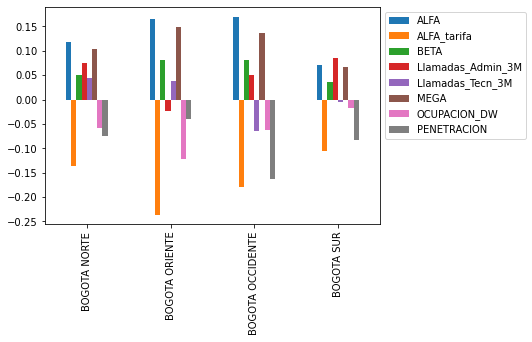

In [70]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]
if conGraficos:    
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

In [71]:
res_corr_total_raz_T[1:]

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
BOGOTA NORTE,0.118225,-0.137177,0.051301,0.07529,0.044476,0.103195,-0.058006,-0.074295
BOGOTA ORIENTE,0.165214,-0.235806,0.08087,-0.023522,0.037814,0.148716,-0.122389,-0.039901
BOGOTA OCCIDENTE,0.16961,-0.178975,0.081258,0.049599,-0.063527,0.136004,-0.062279,-0.162776
BOGOTA SUR,0.071771,-0.104629,0.035882,0.084814,-0.005246,0.065802,-0.017686,-0.08348


In [72]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.158021,-0.113852,0.054865,0.079654,0.019326,0.15312,-0.071202,-0.066963
REGION COSTA,0.139332,-0.131364,0.064993,0.052672,0.040436,0.128191,-0.103941,-0.073132
REGION ORIENTE,0.139316,-0.056828,0.043238,0.186162,0.050221,0.134188,-0.043577,-0.116232
REGION CENTRO,0.145064,-0.17702,0.063073,0.033306,0.010921,0.12934,-0.079718,-0.06867
REGION NOROCCIDENTE,0.091993,-0.065213,0.027967,0.064751,0.022973,0.0915,-0.042292,-0.042657
REGION OCCIDENTE,0.20862,-0.039733,0.062443,0.142094,0.022746,0.210353,-0.067688,-0.11931
BOGOTA,0.144126,-0.17673,0.06256,0.029262,0.009631,0.128845,-0.078626,-0.065132
CALI,0.237801,-0.082376,0.048152,0.101486,-0.019316,0.249298,-0.087979,-0.08512
MEDELLIN,0.12463,-0.075834,0.057815,0.085617,0.083276,0.108622,-0.094627,-0.131381
PEREIRA,0.008878,0.122289,-0.056281,0.05565,-0.08997,0.05799,0.092798,0.089645


### Resultado Atemporal

In [73]:
### Guardar Archivo
##DataSetEntregable_totales.to_csv('CorrelacionesAgrupadas_14Dic.csv',sep=';')

### Temporales

In [74]:
## guardar en tabla
for reg in sectoresBog:
    data_aux=data[data['AREA']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Resulado Temporal

In [75]:
#DataSetEntregable_totales_temp.to_csv('CorrelacionesTemporales_14Dic.csv',sep=';')

# Regresión multilineal

* Reescalado
* Modelos

In [76]:
DataSetEntregable_totales_reg=pd.DataFrame()
DataSetEntregable_totales_temp_reg=pd.DataFrame()

In [77]:
data_reg=data_c0.copy()

In [78]:
sel_variables_causas2

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

In [79]:
data_reg.set_index('COD_NODO',inplace=True)

In [80]:
data_reg=data_reg[sel_variables_causas2+['ind_churn','FECHA']]

In [81]:
data_reg.isnull().sum()/len(data_reg)

ALFA_tarifa          0.011241
ALFA                 0.001613
BETA                 0.000489
MEGA                 0.001149
Llamadas_Admin_3M    0.000000
Llamadas_Tecn_3M     0.000000
PENETRACION          0.000000
OCUPACION_DW         0.000367
ind_churn            0.000000
FECHA                0.000000
dtype: float64

In [82]:
data_reg=data_reg.dropna()

In [83]:
colums_reg=list(data_reg.columns)

In [84]:
colums_reg.remove('FECHA')

In [85]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW',
 'ind_churn']

In [86]:
#for col in colums_reg:
#    data_reg[col]=np.log1p(data_reg[col])

In [87]:
## Escalar
#cols=data_reg.columns
scaler = MinMaxScaler()
data_reg[colums_reg]= scaler.fit_transform(data_reg[colums_reg])

In [88]:
colums_reg.remove('ind_churn')

In [89]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Seleccion Variables Significativas

In [90]:
reg_nal=iter_regresion(data_reg)
reg_nal

1
      coefs        pvalues           Features    VIF
0 -0.026786   2.293805e-80        ALFA_tarifa   8.61
1  0.005602   1.979607e-01               ALFA  21.94
2  0.011368   8.609029e-04               BETA  13.71
3  0.029008   3.214217e-23               MEGA  18.44
4  0.039087  4.033527e-122  Llamadas_Admin_3M  11.07
5 -0.023943   1.493607e-37   Llamadas_Tecn_3M   8.80
6 -0.019834   4.742389e-50        PENETRACION   6.77
7 -0.016891   1.306589e-35       OCUPACION_DW  11.27
      coefs   pvalues Features    VIF
1  0.005602  0.197961     ALFA  21.94
2
      coefs        pvalues           Features    VIF
0 -0.026833   1.081900e-80        ALFA_tarifa   7.89
1  0.015136   5.851433e-18               BETA   4.17
2  0.032419  5.760916e-152               MEGA   3.80
3  0.039083  4.252672e-122  Llamadas_Admin_3M  11.02
4 -0.023902   1.930703e-37   Llamadas_Tecn_3M   8.75
5 -0.019825   5.253522e-50        PENETRACION   6.57
6 -0.016901   1.194053e-35       OCUPACION_DW  10.86
      coefs       p

,coefs,pvalues,Features,VIF
0,-0.026833,1.081900e-80,ALFA_tarifa,7.89
1,0.015136,5.851433e-18,BETA,4.17
2,0.032419,5.760916e-152,MEGA,3.80
3,0.039083,4.252672e-122,Llamadas_Admin_3M,11.02
4,-0.023902,1.930703e-37,Llamadas_Tecn_3M,8.75
5,-0.019825,5.253522e-50,PENETRACION,6.57
6,-0.016901,1.194053e-35,OCUPACION_DW,10.86


In [91]:
colums_reg=list(reg_nal['Features'])
colums_reg

['ALFA_tarifa',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Nacional

In [92]:
# Dividir en X y X
y_train = data_reg['ind_churn']
X_train =  data_reg[colums_reg]

In [93]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ind_churn   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     345.8
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:53:11   Log-Likelihood:                 69031.
No. Observations:               40385   AIC:                        -1.380e+05
Df Residuals:                   40377   BIC:                        -1.380e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0775      0.002     49.545      0.000       0.074       0.081
ALFA_tarifa          -0.0268      0.001    -19.067      0.000      -0.030      -0.024
BETA                  0.0151      0.002      8.639      0.000       0.012       0.019
MEGA                  0.0324      0.001     26.371      0.000       0.030       0.035
Llamadas_Admin_3M     0.0391      0.002     23.579      0.000       0.036       0.042
Llamadas_Tecn_3M     -0.0239      0.002    -12.800      0.000      -0.028      -0.020
PENETRACION          -0.0198      0.001    -14.889      0.000      -0.022      -0.017
OCUPACION_DW         -0.0169      0.001    -12.475      0.000      -0.020      -0.014
==============================================================================
Omnibus:                    20653.570   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           432414.654
Skew:                           1.994   Prob(JB):                         0.00
Kurtosis:                      18.526   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Llamadas_Admin_3M,11.02
6,OCUPACION_DW,10.86
4,Llamadas_Tecn_3M,8.75
0,ALFA_tarifa,7.89
5,PENETRACION,6.57
1,BETA,4.17
2,MEGA,3.80


In [95]:
df_coef_nal=lr_1.params.to_frame()
df_coef_nal.columns=['coefs']

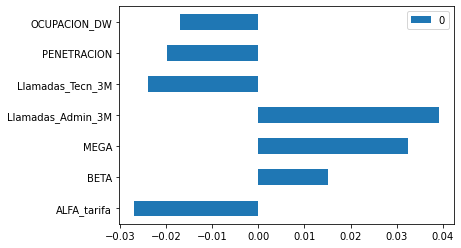

In [96]:
if conGraficos:
    lr_1.params.to_frame()[1:].plot.barh()

In [97]:
df_coef_nal

,coefs
const,0.077454
ALFA_tarifa,-0.026833
BETA,0.015136
MEGA,0.032419
Llamadas_Admin_3M,0.039083
Llamadas_Tecn_3M,-0.023902
PENETRACION,-0.019825
OCUPACION_DW,-0.016901


In [98]:
df_vif_nal=vif

In [99]:
DataSetEntregable_totales_reg=df_coef_nal.copy()

In [100]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg[1:].T
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.026833,0.015136,0.032419,0.039083,-0.023902,-0.019825,-0.016901


In [101]:
DataSetEntregable_totales_reg['index']='NACIONAL'
DataSetEntregable_totales_reg.set_index('index',inplace=True)
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
index,,,,,,,
NACIONAL,-0.026833,0.015136,0.032419,0.039083,-0.023902,-0.019825,-0.016901


## Regresión en el tiempo

In [102]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
RO4,0.471589,0.271056,0.262215,0.409993,0.352992,0.388447,0.345115,0.699387,0.021177,7
KRI,0.607833,0.156819,0.298927,0.210794,0.298745,0.181737,0.287144,0.359557,0.045029,7
5B6022,0.467569,0.272248,0.148336,0.673514,0.460128,0.471657,0.600221,0.448781,0.126437,3
GIA,0.487542,0.037331,0.267557,0.055455,0.481116,0.241001,0.272245,0.397254,0.054149,7
CLD,0.473778,0.166154,0.204135,0.313440,0.378579,0.242209,0.660820,0.587460,0.055971,11
...,...,...,...,...,...,...,...,...,...,...
S04,0.502347,0.444024,0.323249,0.555857,0.390825,0.226038,0.398653,0.336555,0.087600,11
LOM2,0.725675,0.093386,0.276749,0.134580,0.320335,0.326277,0.333580,0.787987,0.040936,3
472D,0.455809,0.260994,0.149482,0.641569,0.366230,0.373531,0.710062,0.440992,0.065476,4


In [103]:
(df_coef, df_vif)=dic_reg_mes_ind(data_reg)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


In [104]:
df_coef

,coefs,1,2,3,4,5,6,7,8,9,10,11
const,0.077454,0.069795,0.057637,0.062524,0.064318,0.070602,0.080312,0.084837,0.068746,0.080791,0.075123,0.061172
ALFA_tarifa,-0.026833,-0.024025,-0.033524,-0.032874,-0.019908,-0.013126,-0.029156,-0.023933,-0.010466,-0.033475,-0.014415,-0.028672
BETA,0.015136,0.014129,0.018061,0.026974,0.020955,0.010744,0.012992,0.009811,0.002284,0.008668,-0.005964,-0.005605
MEGA,0.032419,0.038720,0.036595,0.029895,0.034793,0.043184,0.035963,0.038252,0.043766,0.034126,0.032843,0.031407
Llamadas_Admin_3M,0.039083,0.037588,0.054571,0.048190,0.049904,0.044478,0.045260,0.040815,0.052293,0.054110,0.066511,0.086749
Llamadas_Tecn_3M,-0.023902,-0.011708,-0.021772,-0.017901,-0.021859,-0.025216,-0.018099,-0.015911,-0.021383,-0.025565,-0.021211,-0.033147
PENETRACION,-0.019825,-0.013678,-0.012960,-0.016012,-0.020706,-0.028172,-0.025331,-0.027775,-0.016679,-0.012173,-0.013184,-0.018246
OCUPACION_DW,-0.016901,-0.020794,-0.015211,-0.017085,-0.018088,-0.020868,-0.023896,-0.020807,-0.015285,-0.021178,-0.024897,-0.009531


In [105]:
df_coef_T=df_coef.T
df_coef_T.pop('const')
df_coef_T=df_coef_T[1:]
df_coef_T

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
1,-0.024025,0.014129,0.038720,0.037588,-0.011708,-0.013678,-0.020794
2,-0.033524,0.018061,0.036595,0.054571,-0.021772,-0.012960,-0.015211
3,-0.032874,0.026974,0.029895,0.048190,-0.017901,-0.016012,-0.017085
4,-0.019908,0.020955,0.034793,0.049904,-0.021859,-0.020706,-0.018088
5,-0.013126,0.010744,0.043184,0.044478,-0.025216,-0.028172,-0.020868
6,-0.029156,0.012992,0.035963,0.045260,-0.018099,-0.025331,-0.023896
7,-0.023933,0.009811,0.038252,0.040815,-0.015911,-0.027775,-0.020807
8,-0.010466,0.002284,0.043766,0.052293,-0.021383,-0.016679,-0.015285
9,-0.033475,0.008668,0.034126,0.054110,-0.025565,-0.012173,-0.021178
10,-0.014415,-0.005964,0.032843,0.066511,-0.021211,-0.013184,-0.024897


In [106]:
DataSetEntregable_totales_temp_reg=df_coef_T.copy()

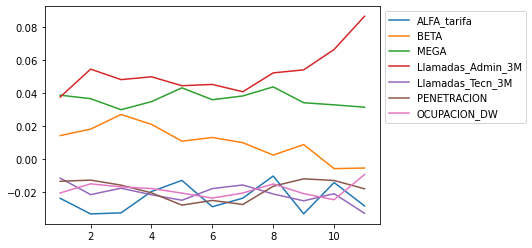

In [107]:
if conGraficos:
    ax = df_coef_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

## Analisis Específicos

In [108]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
RO4,0.471589,0.271056,0.262215,0.409993,0.352992,0.388447,0.345115,0.699387,0.021177,7
KRI,0.607833,0.156819,0.298927,0.210794,0.298745,0.181737,0.287144,0.359557,0.045029,7
5B6022,0.467569,0.272248,0.148336,0.673514,0.460128,0.471657,0.600221,0.448781,0.126437,3
GIA,0.487542,0.037331,0.267557,0.055455,0.481116,0.241001,0.272245,0.397254,0.054149,7
CLD,0.473778,0.166154,0.204135,0.313440,0.378579,0.242209,0.660820,0.587460,0.055971,11
...,...,...,...,...,...,...,...,...,...,...
S04,0.502347,0.444024,0.323249,0.555857,0.390825,0.226038,0.398653,0.336555,0.087600,11
LOM2,0.725675,0.093386,0.276749,0.134580,0.320335,0.326277,0.333580,0.787987,0.040936,3
472D,0.455809,0.260994,0.149482,0.641569,0.366230,0.373531,0.710062,0.440992,0.065476,4


In [109]:
data_reg_nor=data_reg.copy()

In [110]:
data_reg_nor=data_reg_nor.merge(maestro_data, left_index=True, right_on=['COD_NODO'], how='left')
data_reg_nor.set_index('COD_NODO', inplace=True)

In [111]:
data_reg_nor_temp=data_reg_nor.copy()

In [112]:
data_reg_nor.pop('FECHA')

COD_NODO
RO4        7
KRI        7
5B6022     3
GIA        7
CLD       11
          ..
S04       11
LOM2       3
472D       4
ACB       11
E3Z        5
Name: FECHA, Length: 41986, dtype: int64

## Regional

In [113]:
dic_resultados_reg={}

In [114]:
for reg in regionales:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    y_train = data_aux.pop('ind_churn')
    X_train = data_aux[colums_reg]    
    #Modelos
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()    
    dic_aux['coef']=lr_1.params.to_frame()
    dic_aux['coef'].columns=['coefs']
    # Cálculo VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    dic_aux['vif']=vif
    dic_resultados[reg]=dic_aux

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [115]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in regionales:
    print(reg)
    
    aux_tab_coef=dic_resultados[reg]['coef']
    aux_tab_vif=dic_resultados[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [116]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])

In [117]:
df_coef_T

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.026833,0.015136,0.032419,0.039083,-0.023902,-0.019825,-0.016901
REGION COSTA,-0.036490,0.007296,0.011500,0.029342,-0.008602,-0.016807,-0.026151
REGION ORIENTE,-0.024768,0.012786,0.020649,0.069348,-0.036236,-0.022137,-0.003936
REGION CENTRO,-0.050662,0.016754,0.019912,0.034276,-0.018855,-0.016429,-0.020266
REGION NOROCCIDENTE,-0.024090,0.013776,0.050744,0.037918,-0.007684,-0.005141,-0.016560
REGION OCCIDENTE,-0.011385,0.021937,0.056271,0.094114,-0.051657,-0.009649,-0.011068


In [118]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.026833,0.015136,0.032419,0.039083,-0.023902,-0.019825,-0.016901
REGION COSTA,-0.036490,0.007296,0.011500,0.029342,-0.008602,-0.016807,-0.026151
REGION ORIENTE,-0.024768,0.012786,0.020649,0.069348,-0.036236,-0.022137,-0.003936
REGION CENTRO,-0.050662,0.016754,0.019912,0.034276,-0.018855,-0.016429,-0.020266
REGION NOROCCIDENTE,-0.024090,0.013776,0.050744,0.037918,-0.007684,-0.005141,-0.016560
REGION OCCIDENTE,-0.011385,0.021937,0.056271,0.094114,-0.051657,-0.009649,-0.011068


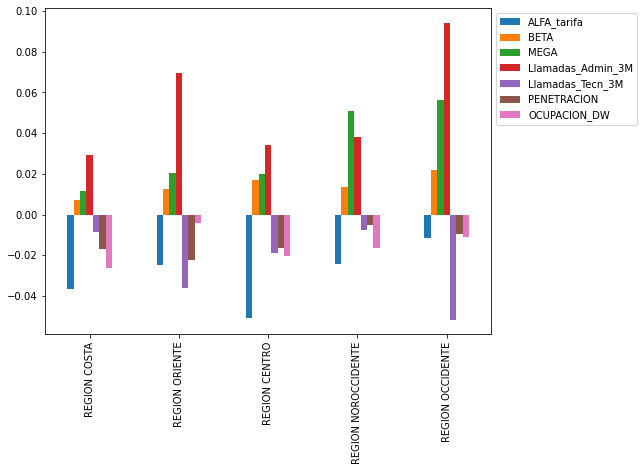

In [119]:
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

####  Analisis temporal

In [120]:
for reg in regionales:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


In [121]:
DataSetEntregable_totales_temp_reg['CATEGORIA']=DataSetEntregable_totales_temp_reg['CATEGORIA'].fillna('NACIONAL')

In [122]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.024025,0.014129,0.038720,0.037588,-0.011708,-0.013678,-0.020794,NACIONAL
2,-0.033524,0.018061,0.036595,0.054571,-0.021772,-0.012960,-0.015211,NACIONAL
3,-0.032874,0.026974,0.029895,0.048190,-0.017901,-0.016012,-0.017085,NACIONAL
4,-0.019908,0.020955,0.034793,0.049904,-0.021859,-0.020706,-0.018088,NACIONAL
5,-0.013126,0.010744,0.043184,0.044478,-0.025216,-0.028172,-0.020868,NACIONAL
...,...,...,...,...,...,...,...,...
7,0.023991,0.014367,0.062987,0.071156,-0.007012,-0.034514,-0.022263,REGION OCCIDENTE
8,0.008283,0.008752,0.076707,0.112559,0.006035,-0.018089,-0.022958,REGION OCCIDENTE
9,-0.032258,0.009096,0.040176,0.107826,-0.064733,0.009414,-0.025868,REGION OCCIDENTE
10,-0.006230,-0.001821,0.046960,0.090339,-0.046812,-0.012608,-0.026399,REGION OCCIDENTE


## Ciudades

In [123]:
dic_resultados_ciudad_reg={}
for reg in ciudades:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['CIUDAD']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_ciudad_reg[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


In [124]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_ciudad_reg:
    print(reg)    
    aux_tab_coef=dic_resultados_ciudad_reg[reg]['coef']
    aux_tab_vif=dic_resultados_ciudad_reg[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


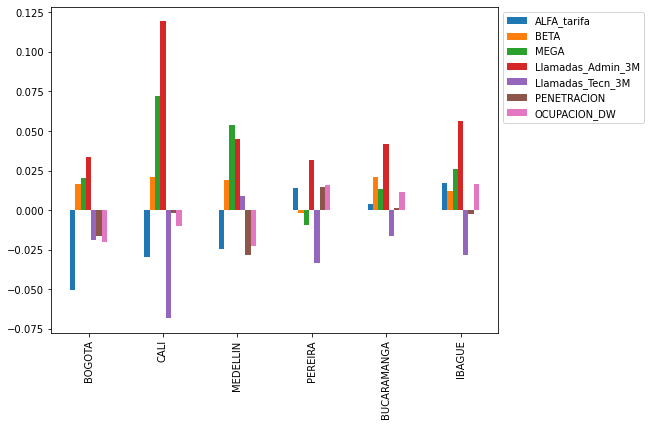

In [125]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [126]:
df_coef_T[1:]

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
BOGOTA,-0.050633,0.016434,0.020004,0.033819,-0.018865,-0.016079,-0.020357
CALI,-0.029682,0.020844,0.072357,0.119192,-0.068190,-0.001597,-0.009943
MEDELLIN,-0.024847,0.018714,0.053728,0.044947,0.008855,-0.028268,-0.023001
PEREIRA,0.013819,-0.001770,-0.009249,0.031388,-0.033506,0.014689,0.015851
BUCARAMANGA,0.003700,0.021148,0.013506,0.041881,-0.016231,0.001410,0.011268
IBAGUE,0.016954,0.011864,0.025692,0.056077,-0.028678,-0.002715,0.016537


In [127]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.026833,0.015136,0.032419,0.039083,-0.023902,-0.019825,-0.016901
REGION COSTA,-0.036490,0.007296,0.011500,0.029342,-0.008602,-0.016807,-0.026151
REGION ORIENTE,-0.024768,0.012786,0.020649,0.069348,-0.036236,-0.022137,-0.003936
REGION CENTRO,-0.050662,0.016754,0.019912,0.034276,-0.018855,-0.016429,-0.020266
REGION NOROCCIDENTE,-0.024090,0.013776,0.050744,0.037918,-0.007684,-0.005141,-0.016560
REGION OCCIDENTE,-0.011385,0.021937,0.056271,0.094114,-0.051657,-0.009649,-0.011068
BOGOTA,-0.050633,0.016434,0.020004,0.033819,-0.018865,-0.016079,-0.020357
CALI,-0.029682,0.020844,0.072357,0.119192,-0.068190,-0.001597,-0.009943
MEDELLIN,-0.024847,0.018714,0.053728,0.044947,0.008855,-0.028268,-0.023001
PEREIRA,0.013819,-0.001770,-0.009249,0.031388,-0.033506,0.014689,0.015851


#### Analisis temporal

In [128]:
for reg in ciudades:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

6
7
8
9
10
11
1
2
3

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


4
5
6
7
8
9
10
11
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

5
6
7
8
9
10
11
1
2
3
4
5
6
7
8

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [129]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.024025,0.014129,0.038720,0.037588,-0.011708,-0.013678,-0.020794,NACIONAL
2,-0.033524,0.018061,0.036595,0.054571,-0.021772,-0.012960,-0.015211,NACIONAL
3,-0.032874,0.026974,0.029895,0.048190,-0.017901,-0.016012,-0.017085,NACIONAL
4,-0.019908,0.020955,0.034793,0.049904,-0.021859,-0.020706,-0.018088,NACIONAL
5,-0.013126,0.010744,0.043184,0.044478,-0.025216,-0.028172,-0.020868,NACIONAL
...,...,...,...,...,...,...,...,...
7,0.051257,-0.046022,0.054594,0.061802,-0.026725,-0.020354,-0.001147,IBAGUE
8,0.087146,-0.009604,0.068466,0.168208,-0.015575,0.063738,-0.035001,IBAGUE
9,0.010258,-0.017186,0.040617,0.147881,-0.084444,0.037910,0.043434,IBAGUE
10,0.012361,0.011334,0.009537,0.093163,0.015817,-0.047336,0.003152,IBAGUE


## Bogota

In [130]:
dic_resultados_Bogota={}
for reg in sectoresBog:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['AREA']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_Bogota[reg]=dic_aux

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


In [131]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_Bogota:
    print(reg)    
    aux_tab_coef=dic_resultados_Bogota[reg]['coef']
    aux_tab_vif=dic_resultados_Bogota[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA NORTE
BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR


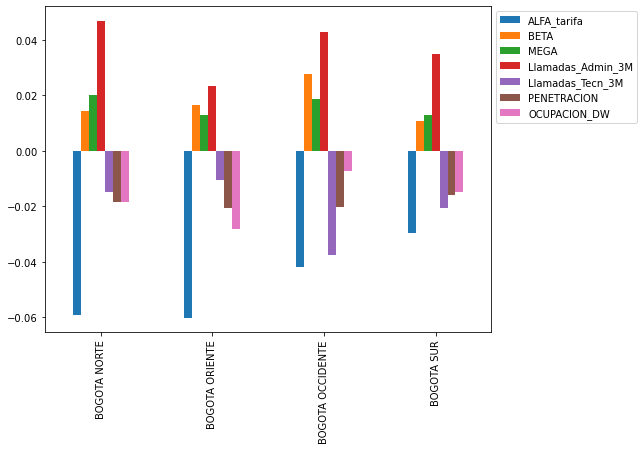

In [132]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [133]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.026833,0.015136,0.032419,0.039083,-0.023902,-0.019825,-0.016901
REGION COSTA,-0.036490,0.007296,0.011500,0.029342,-0.008602,-0.016807,-0.026151
REGION ORIENTE,-0.024768,0.012786,0.020649,0.069348,-0.036236,-0.022137,-0.003936
REGION CENTRO,-0.050662,0.016754,0.019912,0.034276,-0.018855,-0.016429,-0.020266
REGION NOROCCIDENTE,-0.024090,0.013776,0.050744,0.037918,-0.007684,-0.005141,-0.016560
REGION OCCIDENTE,-0.011385,0.021937,0.056271,0.094114,-0.051657,-0.009649,-0.011068
BOGOTA,-0.050633,0.016434,0.020004,0.033819,-0.018865,-0.016079,-0.020357
CALI,-0.029682,0.020844,0.072357,0.119192,-0.068190,-0.001597,-0.009943
MEDELLIN,-0.024847,0.018714,0.053728,0.044947,0.008855,-0.028268,-0.023001
PEREIRA,0.013819,-0.001770,-0.009249,0.031388,-0.033506,0.014689,0.015851


### Analisis Temporal

In [134]:
for reg in sectoresBog:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [135]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.024025,0.014129,0.038720,0.037588,-0.011708,-0.013678,-0.020794,NACIONAL
2,-0.033524,0.018061,0.036595,0.054571,-0.021772,-0.012960,-0.015211,NACIONAL
3,-0.032874,0.026974,0.029895,0.048190,-0.017901,-0.016012,-0.017085,NACIONAL
4,-0.019908,0.020955,0.034793,0.049904,-0.021859,-0.020706,-0.018088,NACIONAL
5,-0.013126,0.010744,0.043184,0.044478,-0.025216,-0.028172,-0.020868,NACIONAL
...,...,...,...,...,...,...,...,...
7,-0.017981,-0.019594,-0.006996,0.047120,-0.011227,-0.024516,-0.017867,BOGOTA SUR
8,-0.026184,0.024393,0.021032,0.059338,-0.053097,-0.000642,-0.013763,BOGOTA SUR
9,0.015101,-0.001666,0.016892,0.033554,-0.005254,-0.000463,0.000004,BOGOTA SUR
10,0.029357,-0.002326,0.040513,0.060782,-0.013264,-0.020860,-0.037078,BOGOTA SUR


In [136]:
### Guardar Archivo

In [137]:
#DataSetEntregable_totales_reg.to_csv('RegresionesAgrupadas_14Dic.csv',sep=';')

In [138]:
#DataSetEntregable_totales_temp_reg.to_csv('RegresionesTemporales_14Dic.csv',sep=';')

## Resultados

In [139]:
DataSetEntregable_totales
DataSetEntregable_totales_temp
DataSetEntregable_totales_reg
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.024025,0.014129,0.038720,0.037588,-0.011708,-0.013678,-0.020794,NACIONAL
2,-0.033524,0.018061,0.036595,0.054571,-0.021772,-0.012960,-0.015211,NACIONAL
3,-0.032874,0.026974,0.029895,0.048190,-0.017901,-0.016012,-0.017085,NACIONAL
4,-0.019908,0.020955,0.034793,0.049904,-0.021859,-0.020706,-0.018088,NACIONAL
5,-0.013126,0.010744,0.043184,0.044478,-0.025216,-0.028172,-0.020868,NACIONAL
...,...,...,...,...,...,...,...,...
7,-0.017981,-0.019594,-0.006996,0.047120,-0.011227,-0.024516,-0.017867,BOGOTA SUR
8,-0.026184,0.024393,0.021032,0.059338,-0.053097,-0.000642,-0.013763,BOGOTA SUR
9,0.015101,-0.001666,0.016892,0.033554,-0.005254,-0.000463,0.000004,BOGOTA SUR
10,0.029357,-0.002326,0.040513,0.060782,-0.013264,-0.020860,-0.037078,BOGOTA SUR
